In [1]:
%config IPCompleter.greedy=True

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Prerequisites

In this and in the following chapters I will assume, that you have at least fundamental knowledge about statistics, probability theory, and mathematical analysis. It is not the goal of this project to teach you probability nor mathematical analysis, there are plenty of resources online that you can get the knowledge required.

I will denote $P(X=x)$ as probability, that variable $X$ has value $x$, especially $P(f(x)=t)$ denotes probablity, that prediction (denoted by $f$ function) predicts correct (target) value $t$ for record $x$. Most of the time, we are interested in prediction over the whole dataset (set of data points), so I will denote $x_i$ as *i*-th datapoint and $t_i$ it's target (the value that should the estimator predict). Put it together, I will use $P(f(x_i)=t_i)$ most of the time.

From the mathematical analysis point of view, I will denote $f(x)$ function of one variable $x$, $f(x_1,x_2,\dots,x_n)$ function of $n$ variables named $x_1, x_2, \dots, x_n$ or simply $f(\pmb{x})$ where $\pmb{x}$ is vector of parameters $\pmb{x}=(x_1,x_2,\dots,x_n)$.

Moreover, I will denote $f'(x)$ or $f'$ as derivative of single parameter function $f$ by its only variable $x$. For functions with multiple parameters I will denote $\frac{\partial f(\pmb{x})}{\partial p}$ or $\frac{\partial f}{\partial p}$ as partial derivation of function $f$ by parameter $p$.

Lastly, I will denote $\nabla f$ as gradient of function $f$, i.e. vector of derivatives for function $f$ by each parameter. Formally for function $f(x_1, x_2, \dots, x_k)$ is 
$$
\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \cdots, \frac{\partial f}{\partial x_k} \right)
$$
At some point, we will need higher-order derivatives, so I will denote $\nabla^2 f$ as a second-order derivative of a function $f$ i.e. Hessian or generally $\nabla^k f$ as *k*-order derivative of function $f$.

# Probability prediction

The perceptron algorithm returned the predicted class - the output was either $0$ or $1$. As we have seen in the previous chapter, some separating hyperplanes are better than others. Intuitively, a hyperplane with more "space" around is better than the one which lies close to the data points. The following picture should help recall that.

![Best separating hyperplane](https://upload.wikimedia.org/wikipedia/commons/2/20/SVM_Example_of_Hyperplanes.png)

We all agree, that the red line is separating the classes better than the black one. We can argue about if it is really the best one, that may depend on other factors. In any way, we would like to have some mechanism, that would tell us "this hyperplane is bad, as it lies near the data points".

Moreover, we would like to receive probabilities $P(f(\pmb{x}_i) = 1)$ of what is the probability, that the datapoint $x_i$ belongs to class $1$. Note that probability for class $0$ is just a supplement $P(f(\pmb{x}_i) = 0) = 1 - P(f(\pmb{x}_i) = 1)$. If we think about it for a moment, we may assume that the datapoints farther from the hyperplane have higher probability, that for the class represented by that half of space than the datapoints closer to the hyperplane. Especially, we know nothing about datapoints on the separating hyperplane, in other words $P(f(\pmb{x}_i) = 1)=P(f(\pmb{x}_i) = 0)=\frac{1}{2}$ for these datapoints. 

So far we will take into account just two classes $0$ and $1$ and we will look into multiple classes in the following chapter.

# Sigmoid

To satisfy the requirements defined above, we will use the sigmoid function 
$$\sigma(x)=\frac{1}{1+e^{-x}}$$
That will be the **activation** function, the same as was the `sign` function in the previous chapter. Remember that we need to apply dot product of the input and use the sigmoid function afterward, when we want to include input variables and weights into the function, the formula is
$$\sigma(\pmb{x})=\frac{1}{1+e^{-\pmb{x}\pmb{w}^T}}$$

And why sigmoid? There is some theory behind, why is the sigmoid good function, but I don't want to dig deeper into it (see [[1]](#Bibliography)). Some of the important properties are:
1. Range of values is in the interval $(0,1)$, so it can directly represent the probability.
1. It is defined over the whole $\mathbb{R}$.
1. Value $\sigma(0)=\frac{1}{2}$, as we expected from the points directly on the hyperplane.
1. It has a nice derivative and can be derived at any point.

The last point doesn't seem to be important right now, but we will see its importance in a moment.

Before we continue, let's see how the sigmoid function looks like and how looks like it's derivative.

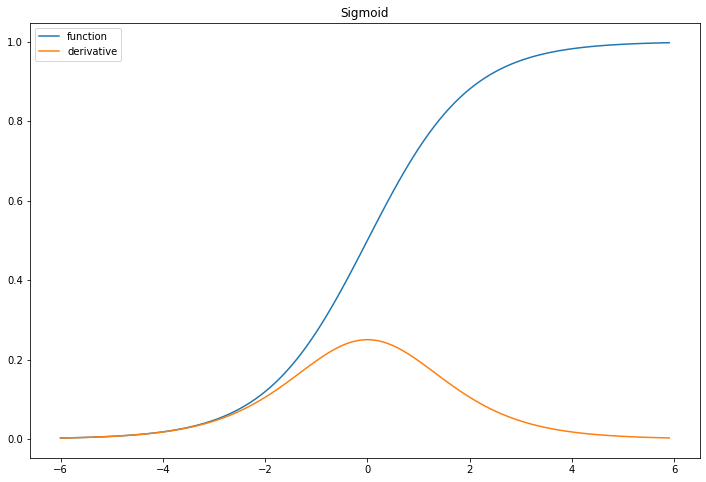

In [2]:
def sig(x):
    return 1 / (1 + np.exp(-x))
x = np.arange(-6, 6, 0.1)
plt.figure(figsize=(12,8))
plt.plot(x, sig(x), label="function")
plt.plot(x, sig(x)*(1-sig(x)), label="derivative")
plt.title("Sigmoid")
plt.legend()
plt.show()

As you probably noticed, derivative of sigmoid is $\sigma'(x)=\sigma(x)\cdot (1 - \sigma(x))$. I will not derive it here as it is not important, but you may try it as the exercise.

Now, let's wrap it up and rewrite our `Perceptron` class to use the sigmoid activation function instead, and let's call it `Neuron` from now. Before we do that, you are probably thinking about the learning process. Neuron has a different learning algorithm and I will show it in a moment, so I will leave the `fit` method empty for this time.

In [3]:
class Neuron:
    def __init__(self, max_iters=100, random_state=None):
        self.max_iters = max_iters
        self.converged = False
        self._rand = np.random.RandomState(random_state)
        self._weights = None
        pass
    
    def _activation(self, vals):  # activation function
        return 1 / (1 + np.exp(-vals))
    
    def fit(self, X, y):
        # Initialize the weights
        self.converged = False
        weights = self._rand.uniform(-2, 2, X.shape[1])
        # ... will be filled out later
        return self
    
    def predict(self, X):
        return self._activation(X @ self._weights)
    
    def __call__(self, X):
        return self.predict(X)

Let's see, how will the prediction look like. Because we don't have the training algorithm (yet), I will set up the weights explicitly, just to observe the behavior. As with the perceptron, the weights define the separating hyperplane. The changes are in the surrounding space - the prediction is not the class, but the probability of the class. I will paint the class $0$ as blue and the class $1$ as red. 

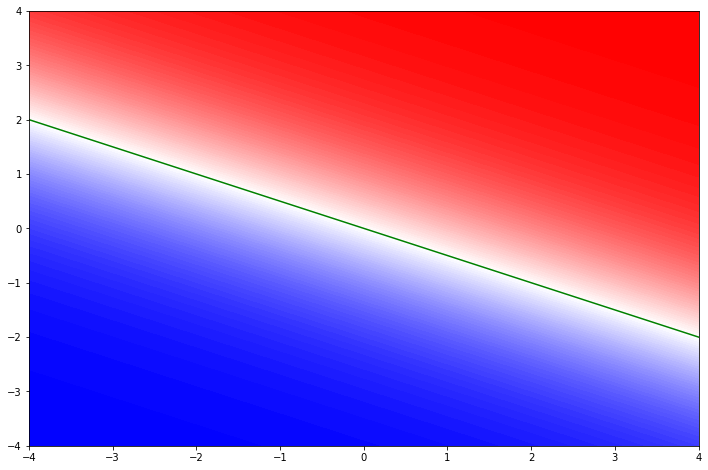

In [4]:
# Create the neuron
n = Neuron()
n._weights = np.array([0.5,1])

# Prepare the data
x, y = np.arange(-4, 4.01, 0.1), np.arange(-4, 4.01, 0.1)
X, Y = np.meshgrid(x, y)
datapoints = np.stack([X.flatten(), Y.flatten()], axis=1)

# Plot the probabilities
plt.figure(figsize=(12, 8))
predictions = n.predict(datapoints).reshape(X.shape)
plt.contourf(x, y, predictions, levels=100, cmap='bwr')

# Plot the separating hyperplane
slope = - n._weights[0] / n._weights[1]
plt.plot([-4, 4], [-4 * slope, 4 * slope], c='g') # plot hyperplane
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

Do you see the white space around the line? That is exactly the part of the space, that the neuron is not sure about. The closer the data point is to the line, the lower is the probability of the class. The separating hyperplane (the green line) has exactly $0.5$ probability, that the class belongs to either class $0$ or $1$.

# Gradient descent

Before we look into the learning algorithm, let's talk about gradient descent. When we compute gradient of the function, the value represents the slope of the tangent and so how fast the function increase (or decrease) at that specific point. For example let's compute tangents of function $3x^2-5x+12$ at the points $-3$ and $2$.

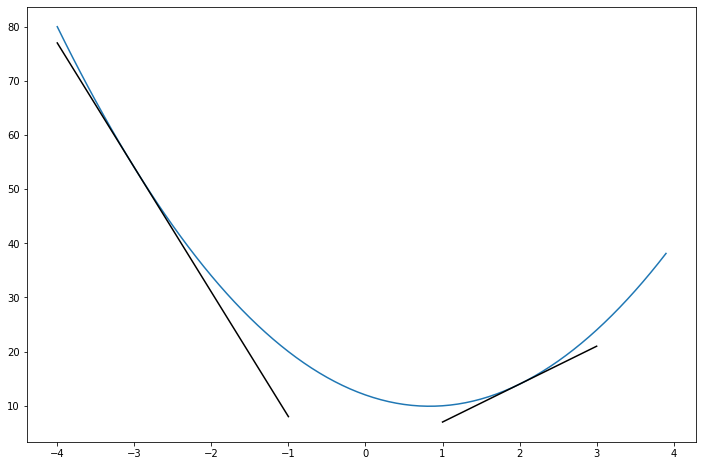

In [5]:
def function(x):
    return 3*x ** 2 - 5 * x + 12
def gradient(x):
    return 6 * x - 5
x = np.arange(-4, 4, 0.1)
plt.figure(figsize=(12,8))
plt.plot(x, function(x))
b1 = function(-3) - gradient(-3)*-3
b2 = function(2) - gradient(2)*2
plt.plot([-4,-1], [-4*gradient(-3)+b1,-1*gradient(-3)+b1], c='black')
plt.plot([1,3], [1*gradient(2)+b2,3*gradient(2)+b2], c='black')
plt.show()

Notice how I plot the lines. The tangent at the point $-3$ is plot as $y=x\cdot f'(-3) + b$, but that is exactly the line formula $y=ax+b$ where $a=f'(-3)$ i.e. the slope.

We want to reach minimum (in this case) of the function - that mean we want to figure out that for value $x=\frac{5}{6}$ the function has the minimum value $f(\frac{5}{6})=\frac{119}{12}$. In this particular case, it is easy to find out analytically (just put $f'(x)=0$), however, that is not always the case. 

We may use the derivative different way. Notice that all the derivatives for $x<\frac{5}{6}$ are $f'(x)<0$ and all the derivatives for $x>\frac{5}{6}$ are $f'(x)>0$. In another world, the sign of derivative tells us the direction in which to move to reach the minimum. Moreover, in this case, the farther is the derivative from the minimum, the bigger value it acquires. In our case $|f'(-3)|=-23$ whereas $|f'(2)|=7$. The derivative doesn't tell us only the direction, but also how far we are from the minimum as thus how far we can move.

Let's try it in the code. We will start with the value $x=-4$. During every step, the gradient descent algorithm computes the gradient at that point and steps in the opposite direction, that the gradient points to (it will minimalize the value). This has one problem - the absolute value of gradient is usually too big to be used directly. Instead, we will multiply it by constant $\alpha$ (in this case $\alpha=0.1$) called **learning rate** to decrease it a little bit. Formally $x_{new}=x - \alpha \cdot f'(x)$. Let's see the example with the plot to better understand it.

The found value 0.8328265216 that is 0.0005068117333333344 away from the optimum.


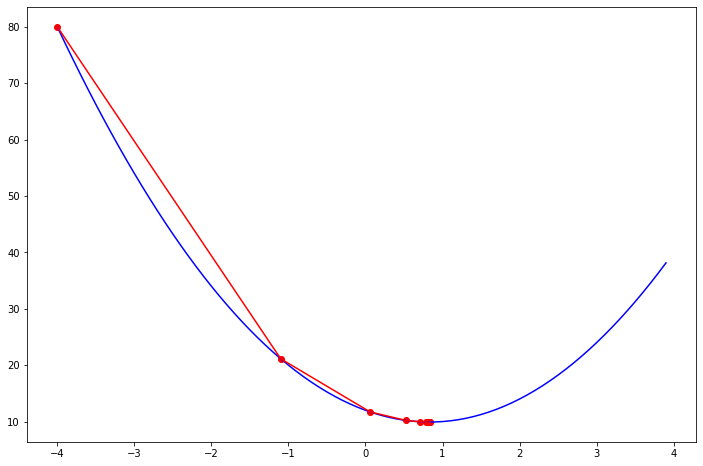

In [6]:
x = np.arange(-4, 4, 0.1)
# start point
point=-4
values=np.array([[point, function(point)]], dtype=float)

# perform 10 steps of gradient descent
for i in range(10):
    point = point - 0.1 * gradient(point)
    values = np.append(values, [[point, function(point)]], axis=0)
print(f"The found value {point} that is {np.abs(point - 5/6)} away from the optimum.")

# plot the steps
plt.figure(figsize=(12,8))
plt.plot(x, function(x), c='blue')
plt.plot(values[:,0], values[:,1], c='red')
plt.scatter(values[:,0], values[:,1], c='red')
plt.show()

We reached almost the optimum (with the difference only $0.0005$) and we can apply this technique to any function we want to.

Before moving forward, let's see whats happen if we change the learning rate.

The found value -138.97308323840025 that is 139.8064165717336 away from the optimum.


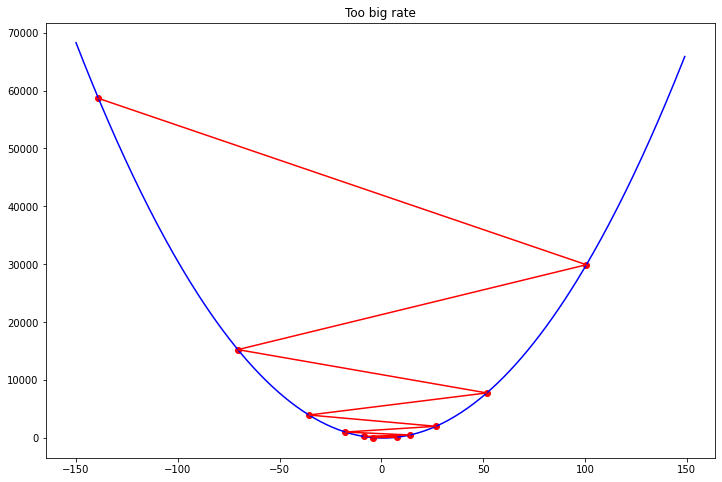

In [7]:
x = np.arange(-150, 150)
# start point
point=-4
values=np.array([[point, function(point)]], dtype=float)

# perform 10 steps of gradient descent
for i in range(10):
    point = point - 0.4 * gradient(point)  # learning rate 0.4
    values = np.append(values, [[point, function(point)]], axis=0)
print(f"The found value {point} that is {np.abs(point - 5/6)} away from the optimum.")

# plot the steps
plt.figure(figsize=(12,8))
plt.plot(x, function(x), c='blue')
plt.plot(values[:,0], values[:,1], c='red')
plt.scatter(values[:,0], values[:,1], c='red')
plt.title("Too big rate")
plt.show()

The found value -1.7699730514586816 that is 2.603306384792015 away from the optimum.


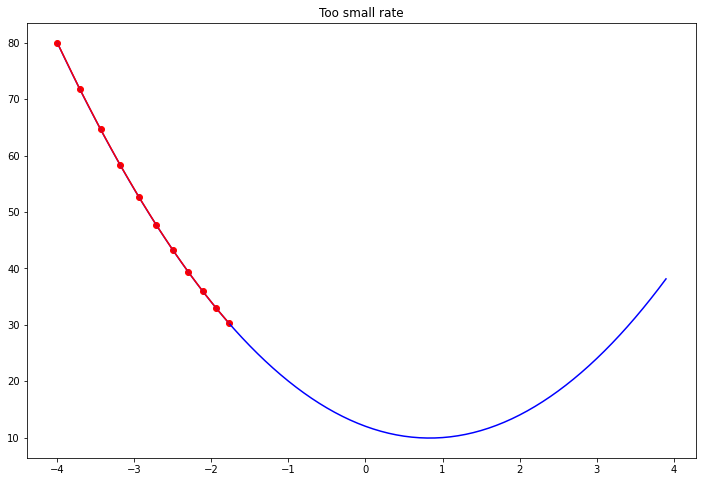

In [8]:
x = np.arange(-4, 4, 0.1)
# start point
point=-4
values=np.array([[point, function(point)]], dtype=float)

# perform 10 steps of gradient descent
for i in range(10):
    point = point - 0.01 * gradient(point)  # learning rate 0.01
    values = np.append(values, [[point, function(point)]], axis=0)
print(f"The found value {point} that is {np.abs(point - 5/6)} away from the optimum.")

# plot the steps
plt.figure(figsize=(12,8))
plt.plot(x, function(x), c='blue')
plt.plot(values[:,0], values[:,1], c='red')
plt.scatter(values[:,0], values[:,1], c='red')
plt.title("Too small rate")
plt.show()

The found value 0.3143581184000006 that is 0.5189752149333328 away from the optimum.


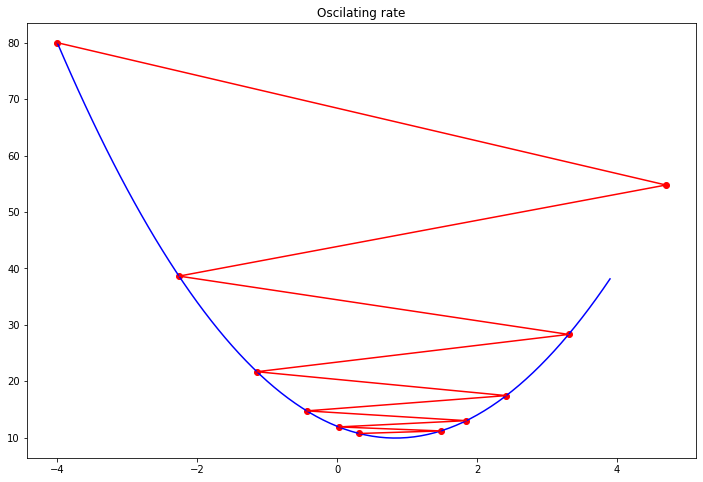

In [9]:
x = np.arange(-4, 4, 0.1)
# start point
point=-4
values=np.array([[point, function(point)]], dtype=float)

# perform 10 steps of gradient descent
for i in range(10):
    point = point - 0.3 * gradient(point)  # learning rate 0.3
    values = np.append(values, [[point, function(point)]], axis=0)
print(f"The found value {point} that is {np.abs(point - 5/6)} away from the optimum.")

# plot the steps
plt.figure(figsize=(12,8))
plt.plot(x, function(x), c='blue')
plt.plot(values[:,0], values[:,1], c='red')
plt.scatter(values[:,0], values[:,1], c='red')
plt.title("Oscilating rate")
plt.show()

In the first case, when I set up the rate too high, the point moved away from the optimum. The gradient was too big and the algorithm "jumped over" the minimum to the other side of the parabola. Moreover, the algorithm jumped even farther away from the minimum - that increased gradient, and as consequence lead to the bigger jump in the next step and so on.

The third case is linked to the first one. This time, the rate was set up lower, but still leads to oscillating and jumping over the minimum. Luckily, this time the algorithm doesn't jump so much and in fact converges after some time to the minimum.

The second case demonstrates the opposite problem. Because the rate is too small, the steps are as well too smalls and the algorithm needs around 150 steps to converge (unlike 10 steps with the proper rate). On the other hand, the algorithm at least converges (eventually) so this case is not as dangerous as the first one.

In this section, I wanted to point out the importance of the constant $\alpha$ aka the *rate*. I will use similar constants a lot through the following chapters and most of the time I will refer to them as *learning rate* (because they control the speed of training). There is no universal solution or rule, how to set up the learning rate, although we will probably look into some techniques later on. Please keep in mind the importance of the learning rate and how significantly it may speed up the training (in order of magnitude).

## Non-convex case

Unfortunately, gradient descent doesn't solve every problem. First of all, the function needs to be derivable over the whole parameter space (in our case $\mathbb{R}$) - now you may notice, why I mentioned it as one of the sigmoid function property. Moreover, to reach the global optimum (practically that mean the best possible solution) the function we try to optimize needs to be convex. Formally is a function $f$ convex if and only if the second-order derivative has the same sign over the whole domain. Practically it means that the function is "curved" the same way all the time. The function $f(x)=3x^2-5x+12$ we see before is convex, and the second derivative is $f''(x)=\frac{\partial^2 f}{\partial x^2}=6$ so its always positive. If we take different function, for example $g(x)=x^4 - 4x^3 + 2x^2 + 8x + 1$, the second derivative $g''(x)=12x^2-24x+4$ and it is easy to verify that $g''(x)<0$ for $x\in\left(1-\sqrt{\frac{2}{3}}, 1+\sqrt{\frac{2}{3}}\right)$ and $g''(x)>=0$ otherwise.

As with sigmoid, let's render the function and it's derivative.

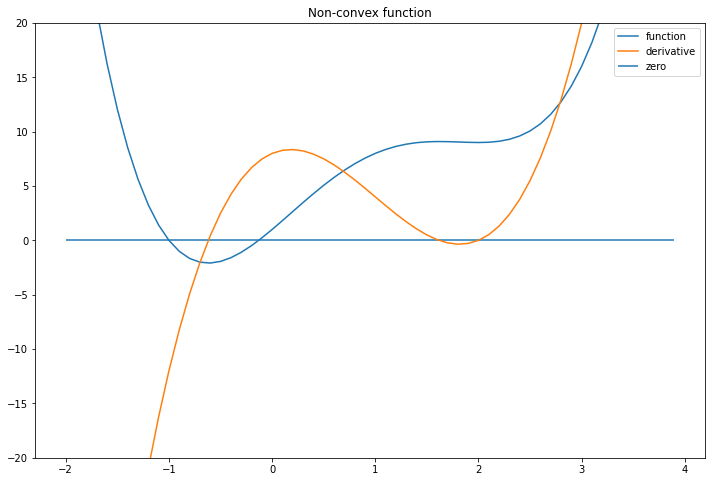

In [10]:
def function(x):
    return x**4 - 4 * x**3 + 2 * x**2 + 8 * x + 1
def gradient(x):
    return 4 * x**3 - 12 * x**2 + 4 * x + 8

x = np.arange(-2, 4, 0.1)
plt.figure(figsize=(12,8))
plt.plot(x, function(x), label="function")
plt.plot(x, gradient(x), label="derivative")
plt.hlines(0, np.min(x), np.max(x), label="zero")
plt.title("Non-convex function")
plt.ylim(-20,20)
plt.legend()
plt.show()

Now let's try to use gradient descent for starting points $\left\{-2, 1, 1.618, 4\right\}$.

From start -2 found -0.6496118977460987 that is 0.03157790899620383 away from the optimum.
From start 1 found 0.43311950308531477 that is 1.0511534918352097 away from the optimum.
From start 1.618 found 1.6179864287277264 that is 2.2360204174776213 away from the optimum.
From start 4 found 2.3160680223963097 that is 2.9341020111462046 away from the optimum.


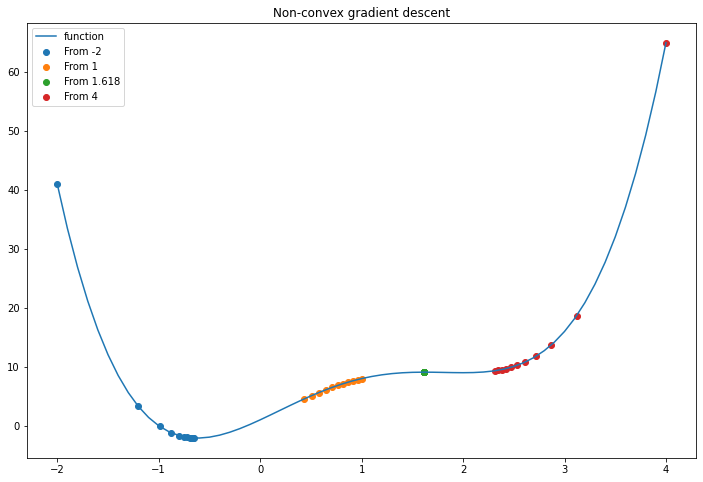

In [11]:
x = np.arange(-2, 4.01, 0.1)
# start points
points=[-2, 1, 1.618, 4]
orig_points=list(points)
values = [np.array([[point, function(point)]], dtype=float) for point in points]

# perform 10 steps of gradient descent
for i in range(10):
    for p in range(len(points)):
        points[p] = points[p] - 0.01 * gradient(points[p])
        values[p] = np.append(values[p], [[points[p], function(points[p])]], axis=0)

for p in range(len(points)):
    print(f"From start {orig_points[p]} found {points[p]} that is {np.abs(points[p] - (1-np.sqrt(5))/2)} away from the optimum.")

# plot the steps
plt.figure(figsize=(12,8))
plt.plot(x, function(x), label="function")
for i in range(len(points)):
    plt.scatter(values[i][:,0], values[i][:,1], label=f"From {orig_points[i]}")
plt.title("Non-convex gradient descent")
plt.legend()
plt.show()

If we start at the point $-2$, everything works nicely, and the algorithm converges to the minimum. For the starting point $-1$, the gradients are too smalls (as the function is flatter there), so the steps are too small to converge within 10 iterations, but still, the algorithm converges (after more steps) into the minimum. Now let's look at the last two points. Firstly the point $1.618$ - I picked this particular number, that sits exactly at the top of the hill (well, almost exactly as the numbers in computer have limited precision). That is, the gradient is zero (as is shown on the plot above) and the points don't move at all. Lastly, when we start at the point $4$, the algorithm converges to some point and it can't continue to the global minimum as it would need to ascend the function - but gradient discourages from doing so. We say that the algorithm reaches the local minimum.

In general, there is no guarantee, that the gradient descent finds the global optimum of the function unless the function is convex. That is a problem because most of the functions we are going to see are not convex. I will be talking about some techniques to mitigate this problem later on. For now, please keep in mind that the gradient descent guarantee to find some optimum, however not the global one.

## Multidimensional case

The situation above applies to multiparametric functions as well. This time, the gradient is not a number, but rather a vector. Gradient of function $f$ with parameters $x_1, x_2, \dots, x_k$ is 
$$
\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \cdots, \frac{\partial f}{\partial x_k} \right)
$$

Let's quickly demonstrate it on [monkey saddle](https://en.wikipedia.org/wiki/Monkey_saddle) function $f(x,y)=x^3-3xy^2$. Let's first examine the function.  

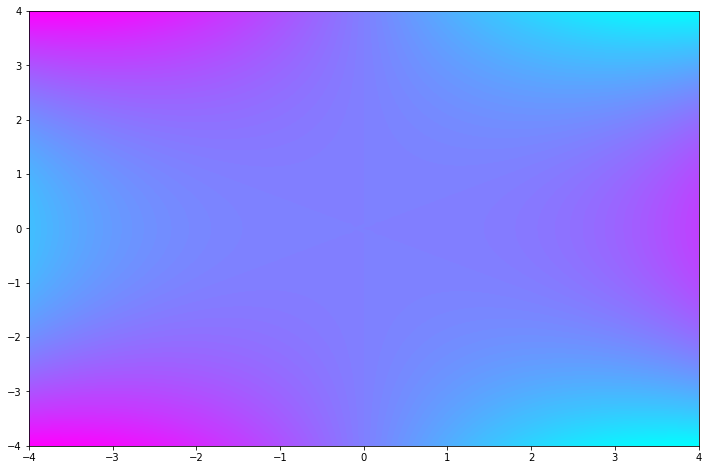

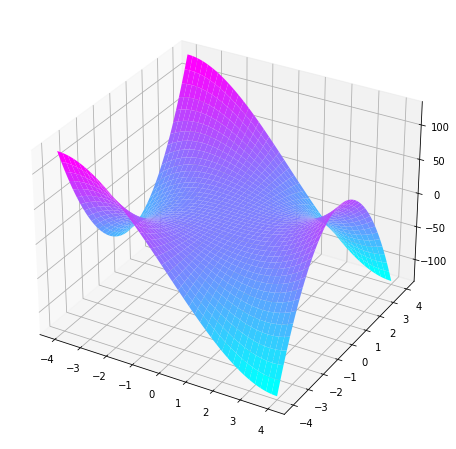

In [12]:
def function(x, y):
    return x**3 - 3 * x * y**2

x, y = np.arange(-4, 4.01, 0.1), np.arange(-4, 4.01, 0.1)
X, Y = np.meshgrid(x, y)
datapoints = np.stack([X.flatten(), Y.flatten()], axis=1)
values = function(X,Y)

# Plot contour
plt.figure(figsize=(12,8))
plt.contourf(x, y, values, levels=100, cmap='cool')
plt.show()

# Plot 3D
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, values, cmap='cool')
plt.show()

The gradient of this function is
$$
\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = \left( 3x^2-3y^2, -6xy \right)
$$

We can now use the same algorithm as before and try to minimalize the value.

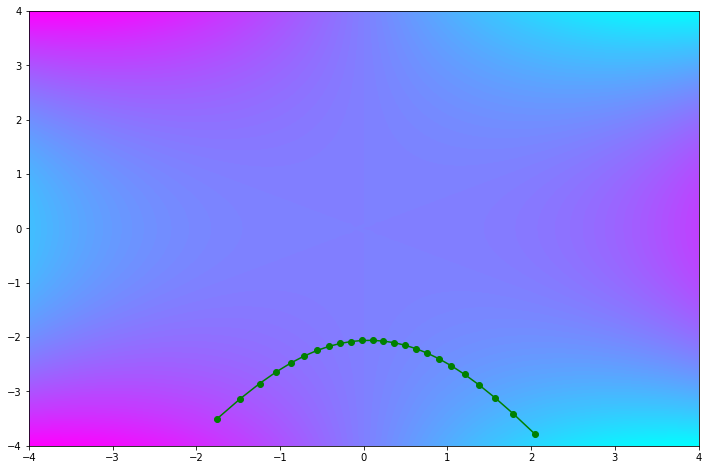

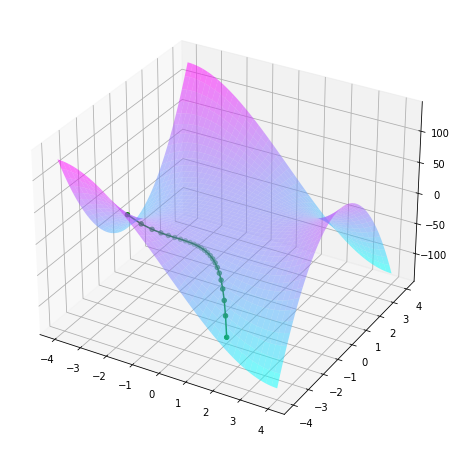

In [13]:
def gradient(x, y):
    return [3 * x**2 - 3 * y**2, -6*x*y]

iterations = 24
parameters = np.array([-1.75, -3.5])
steps = np.zeros((iterations, 3))

for iteration in range(iterations):
    # store current step
    steps[iteration] = list(parameters) + [function(*parameters)]
    # compute gradient
    grad = np.array(gradient(*parameters))
    # make the step
    parameters -= 0.01 * grad

 
# Plot contour
plt.figure(figsize=(12,8))
plt.contourf(x, y, values, levels=100, cmap='cool')
plt.plot(steps[:, 0], steps[:, 1], c='green')
plt.scatter(steps[:, 0], steps[:, 1], c='green')
plt.show()   

# Plot 3D
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, values, cmap='cool', shade=False, alpha=0.5)
ax.plot3D(steps[:,0], steps[:,1], steps[:,2], c='green')
ax.scatter3D(steps[:,0], steps[:,1], steps[:,2], c='green')
plt.show()

As before the algorithm finds the direction down and makes steps according to the gradient value. We can generalize this for more dimension (function with more parameters) as well. I will not show it here, as it's not really possible to plot in 4D. However, the technique remains the same.


> I use `mplot3d` for `matplotlib` and as the library is not a proper 3D renderer, these plots may have some glitches. Please excuse me for this as there isn't much I can do about it.

# Loss function

Before we move on, we need to cover one more topic. The purpose of the loss function is to tell us, how good (or bad) is our model during training. The loss function is **THE** function we want to optimize. 

For example in the perceptron case (see previous chapters), the loss function was "number of wrongly classified data points". That can be written formally as 
$$
loss(\pmb{X}, \pmb{t})=\sum_{i=0}^n |t_i - f(\pmb{x_i})|
$$

In the case of logistic regression, we may use the same function, however, try to figure out what happens when we differentiate the function. The absolute value is not derivable over the whole domain and, moreover, the function disappears after the derivation. We need to use different loss function, for now, I will present you mean squared error loss (in short MSE)
$$
MSE(\pmb{X}, \pmb{t})=\frac{1}{n} \sum_{i=0}^n (t_i - f(\pmb{x_i}))^2
$$

There is as well some theory behind, why is MSE good loss function (see [[2]](#Bibliography)) that I am not going to dig into. So far we will stick with MSE loss and look for other loss functions later on when we will need them.

Before proceeding, notice that the $\frac{1}{n}$ term before the sum is constant (when we have the data in hand), so optimizing this function (minimalizing it) is the same as optimizing
$$
\mathcal{L}_{MSE}(\pmb{X}, \pmb{t})=\frac{1}{2} \sum_{i=0}^n (t_i - f(\pmb{x_i}))^2
$$

You may probably see where I am heading. After the derivation, we can rid of the fraction and end up with the loss only.
$$
\frac{\partial \mathcal{L}_{MSE}}{\partial f}=-\sum_{i=0}^n t_i - f(\pmb{x_i})
$$

At this point, we covered all the theory we need to have in order to implement the logistic regression training algorithm. As you may expect, it will be based on the gradient descent algorithm and will use MSE as the loss function. You should be already able to write it on your own, so you can try. We will look into it in more detail in the next chapter.

# Bibliography

[1] The equivalence of logistic regression and maximum entropy models, John Mount, 23 September 2011, http://www.win-vector.com/dfiles/LogisticRegressionMaxEnt.pdf 

[2] MSE as Maximum Likelihood, Jessica Yung, June 2018, https://www.jessicayung.com/mse-as-maximum-likelihood/